In [1]:
%load_ext autoreload

In [10]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../..')
from nld_utils import simulate_lorenz
from reservoir_computing import ReservoirDS

### 1) Initialize Parameters

In [5]:
T = 100 # s, duration of time series
dt = 0.02 # s, time step
D_r = 300 # number of reservoir nodes
d = 6 # average degree of Erdos-Renyi network
rho = 1.2 # spectral radius of the adjacency matrix

beta = 0 # regularization parameter
sigma = 0.1 # standard deviation of the input weights

### 2) Simulating the Lorenz Attractor

The equations that govern the Lorenz attractor are:

$$\frac{dx}{dt} = \sigma(y - x)$$

$$\frac{dy}{dt} = x(\rho - z) - y$$

$$\frac{dz}{dt} = xy - \beta z$$

where we set $\rho = 28$, $\beta = \frac{8}{3}$ and $\sigma = 10$ based on https://itp.uni-frankfurt.de/~gros/Vorlesungen/SO/simulation_example/.

In [6]:
lorenz_pts = simulate_lorenz(dt=dt, T=T)

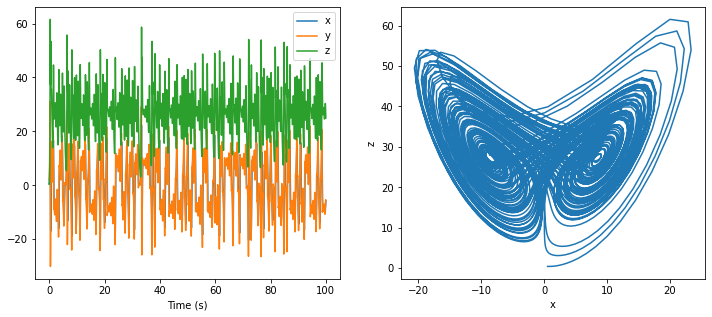

In [11]:
time_vals = np.arange(len(lorenz_pts))*dt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time_vals, lorenz_pts[:, 0], label='x')
plt.plot(time_vals, lorenz_pts[:, 1], label='y')
plt.plot(time_vals, lorenz_pts[:, 2], label='z')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lorenz_pts[:, 0], lorenz_pts[:, 2])
plt.xlabel('x')
plt.ylabel('z')

plt.show()

### Build the Network

In [12]:
reservoir = ReservoirDS(lorenz_pts, dt=dt, D_r=D_r, d=d, rho=rho, beta=beta, sigma=sigma, squared_unit_input_dims=[2])

The average degree of the network is 6.19


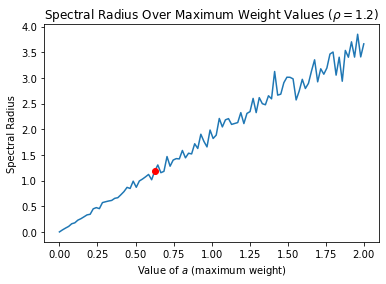

The spectral radius is 1.185


In [26]:
reservoir.build_connectivity(debug=True)

In [27]:
reservoir.train()

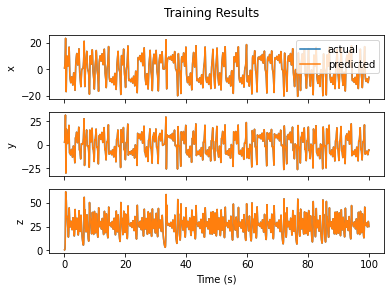

In [28]:
reservoir.print_train_results()

In [29]:
reservoir.test(25)

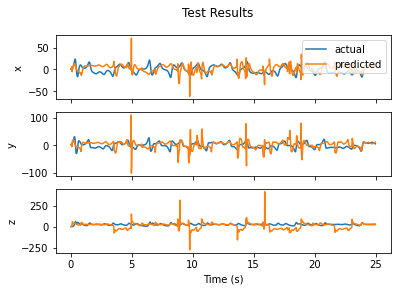

In [30]:
reservoir.print_test_results()